**IMPORTING LIBRARIES AND DATASET**

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [170]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [171]:
#diamension of the dataset
df.shape

(205, 26)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**PREPROCESSING**

In [173]:
company=df['CarName'].apply(lambda x:x.split(' ')[0])
df.insert(3,'company',company)
df.drop(['CarName','car_ID'],axis=1,inplace=True)

df.head()



,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [174]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [175]:
df['company']=df['company'].str.replace('maxda','mazda')
df['company']=df['company'].str.replace('Nissan','nissan')
df['company']=df['company'].str.replace('porcshce','porsche')
df['company']=df['company'].str.replace('toyouta','toyota')
df['company']=df['company'].str.replace('vokswagen','volkswagen')
df['company']=df['company'].str.replace('vw','volkswagen')
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [176]:
df.tail()

,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [177]:
#checking for missing values
df.isna().sum()

symboling           0
company             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [178]:
df.dtypes

symboling             int64
company              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [179]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [180]:
df['doornumber']=df['doornumber'].str.replace('two','2')
df['doornumber']=df['doornumber'].str.replace('four','4')
df['doornumber']=df['doornumber'].astype('int')
df.dtypes

symboling             int64
company              object
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [181]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [182]:
df['drivewheel']=df['drivewheel'].str.replace('4wd','fwd')
df['drivewheel'].unique()

array(['rwd', 'fwd'], dtype=object)

In [183]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [184]:
df['cylindernumber']=df['cylindernumber'].str.replace('four','4')
df['cylindernumber']=df['cylindernumber'].str.replace('six','6')
df['cylindernumber']=df['cylindernumber'].str.replace('five','5')
df['cylindernumber']=df['cylindernumber'].str.replace('three','3')
df['cylindernumber']=df['cylindernumber'].str.replace('twelve','12')
df['cylindernumber']=df['cylindernumber'].str.replace('eight','8')
df['cylindernumber']=df['cylindernumber'].str.replace('two','2')
df['cylindernumber']=df['cylindernumber'].astype('int')
df.dtypes

symboling             int64
company              object
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

**VISUALIZATION**

In [185]:
df['price'].describe()


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Car Price spread')

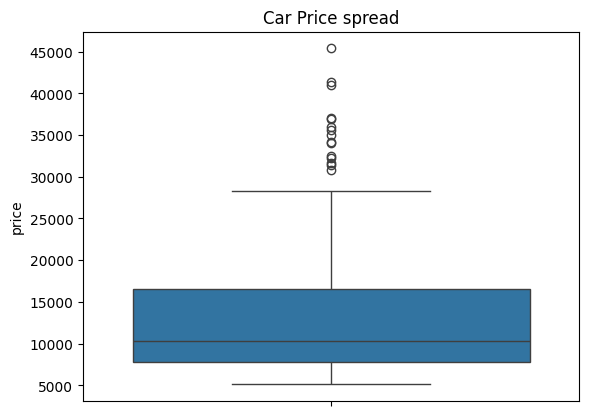

In [186]:
#detecting and removing outliers
# plt.figure(figsize=(5,5))
sns.boxplot(y=df['price'])
plt.title('Car Price spread')

In [187]:
# IQR Calculation
q1=df.price.quantile(0.25)
q3=df.price.quantile(0.75)
IQR=q3-q1
print(IQR)

8715.0


In [188]:
threshold=1.5
df=df[~((df.price < (q1-threshold*IQR))|(df.price>(q3+threshold*IQR)))]
df['price'].describe()

count      190.000000
mean     11509.400879
std       4968.444389
min       5118.000000
25%       7701.250000
50%       9959.500000
75%      15197.500000
max      28248.000000
Name: price, dtype: float64

In [189]:
df
# 205 rows intially now 190 reows ie; 15 outliers found

,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,4,sedan,fwd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [190]:
df.dtypes

symboling             int64
company              object
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

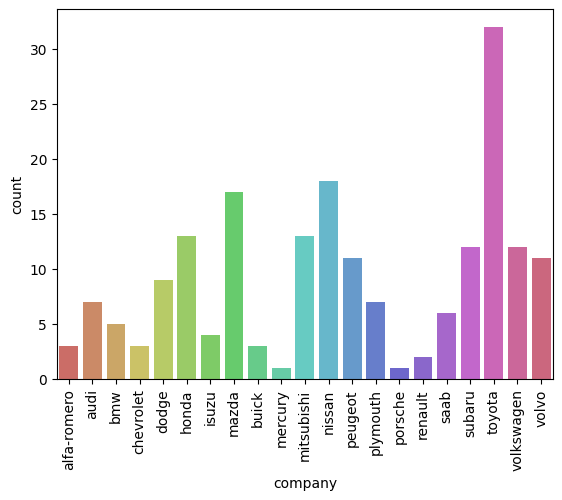

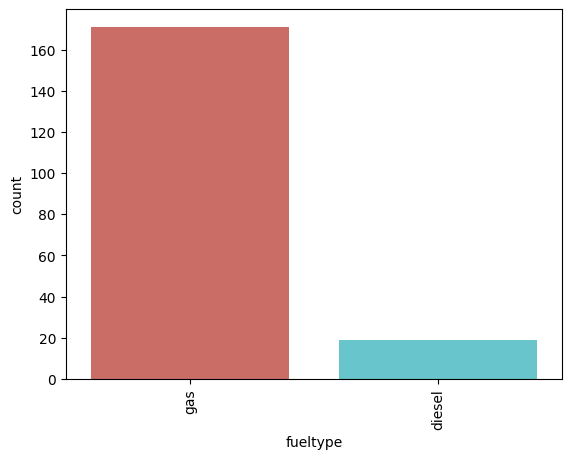

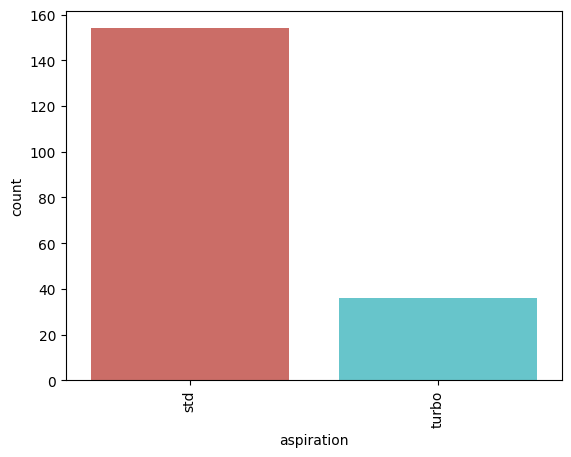

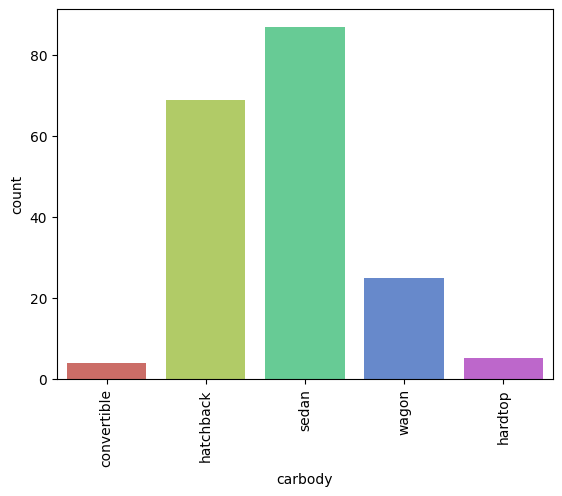

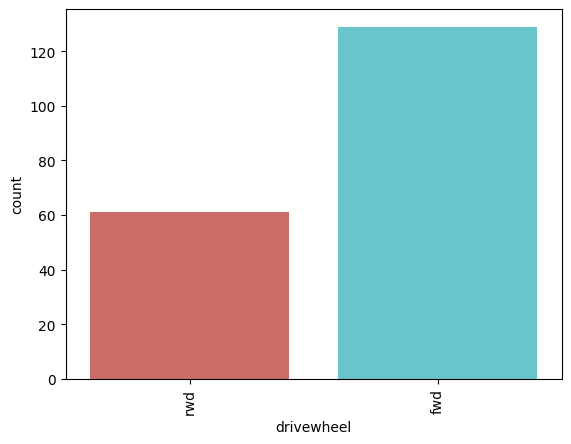

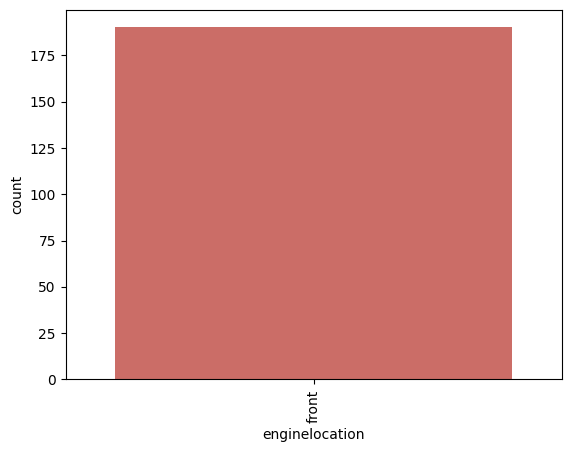

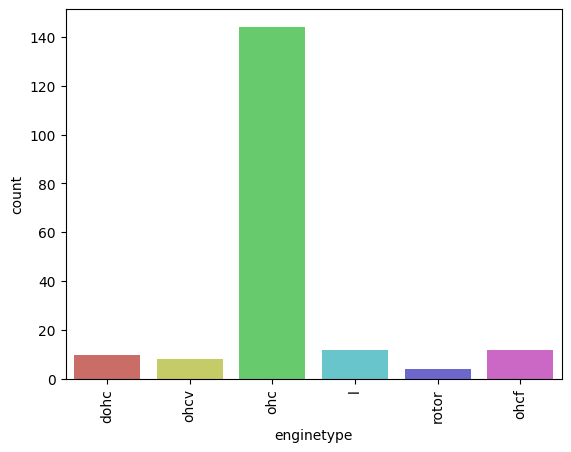

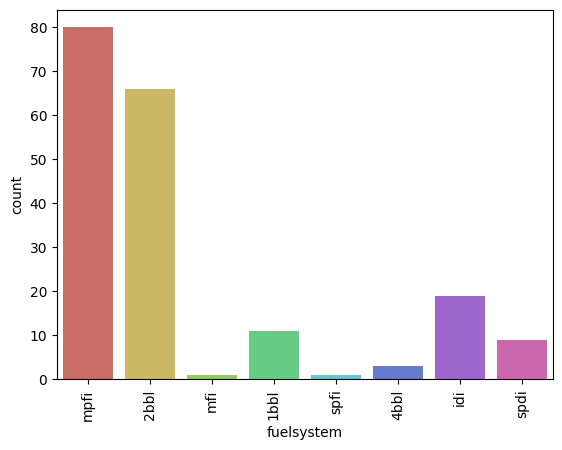

In [191]:
object_list=['company','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']
for i in object_list:
  plt.figure()
  ax=sns.countplot(data=df,x=i,palette='hls')
  plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'alfa-romero'),
  Text(1, 0, 'audi'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'chevrolet'),
  Text(4, 0, 'dodge'),
  Text(5, 0, 'honda'),
  Text(6, 0, 'isuzu'),
  Text(7, 0, 'mazda'),
  Text(8, 0, 'buick'),
  Text(9, 0, 'mercury'),
  Text(10, 0, 'mitsubishi'),
  Text(11, 0, 'nissan'),
  Text(12, 0, 'peugeot'),
  Text(13, 0, 'plymouth'),
  Text(14, 0, 'porsche'),
  Text(15, 0, 'renault'),
  Text(16, 0, 'saab'),
  Text(17, 0, 'subaru'),
  Text(18, 0, 'toyota'),
  Text(19, 0, 'volkswagen'),
  Text(20, 0, 'volvo')])

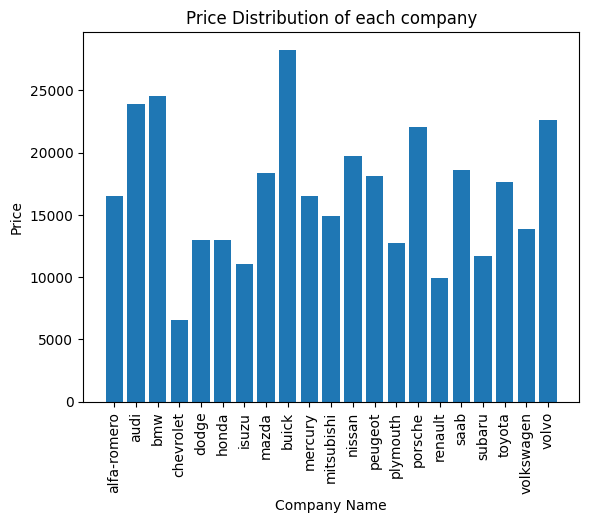

In [192]:
plt.bar(df['company'],df['price'])
plt.title('Price Distribution of each company')
plt.xlabel('Company Name')
plt.ylabel('Price')
plt.xticks(rotation=90)

In [193]:
#correlation
df.corr()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.661596,-0.510587,-0.327519,-0.210088,-0.542455,-0.221915,-0.170454,-0.125601,-0.157305,0.055306,-0.175222,0.076022,0.239516,-0.046133,0.018035,-0.128941
doornumber,-0.661596,1.000000,0.453853,0.423849,0.252889,0.538644,0.243715,0.099014,0.092876,0.165858,-0.081523,0.181074,-0.075789,-0.224638,-0.039984,-0.053093,0.144604
wheelbase,-0.510587,0.453853,1.000000,0.859280,0.794353,0.633945,0.780903,0.271599,0.570260,0.512363,0.055781,0.302991,0.377546,-0.304770,-0.455649,-0.511091,0.667712
carlength,-0.327519,0.423849,0.859280,1.000000,0.832535,0.534056,0.869948,0.327822,0.686552,0.599479,0.059792,0.191597,0.564379,-0.252795,-0.645277,-0.663684,0.729734
carwidth,-0.210088,0.252889,0.794353,0.832535,1.000000,0.342674,0.838538,0.356667,0.698108,0.528538,0.166125,0.229062,0.603085,-0.187687,-0.606134,-0.631884,0.791890
carheight,-0.542455,0.538644,0.633945,0.534056,0.342674,1.000000,0.388335,0.125276,0.178920,0.212620,-0.105190,0.275279,-0.039881,-0.310161,-0.080626,-0.133196,0.254564
curbweight,-0.221915,0.243715,0.780903,0.869948,0.838538,0.388335,1.000000,0.448406,0.837881,0.627042,0.123491,0.207844,0.734304,-0.264091,-0.724138,-0.760200,0.853951
cylindernumber,-0.170454,0.099014,0.271599,0.327822,0.356667,0.125276,0.448406,1.000000,0.699974,0.003067,0.078199,0.031845,0.475711,-0.176349,-0.281804,-0.303095,0.464196
enginesize,-0.125601,0.092876,0.570260,0.686552,0.698108,0.178920,0.837881,0.699974,1.000000,0.579403,0.272543,0.122765,0.757357,-0.331153,-0.609982,-0.625118,0.749883
boreratio,-0.157305,0.165858,0.512363,0.599479,0.528538,0.212620,0.627042,0.003067,0.579403,1.000000,-0.077820,0.023580,0.497082,-0.307256,-0.526432,-0.543197,0.499244


<Axes: >

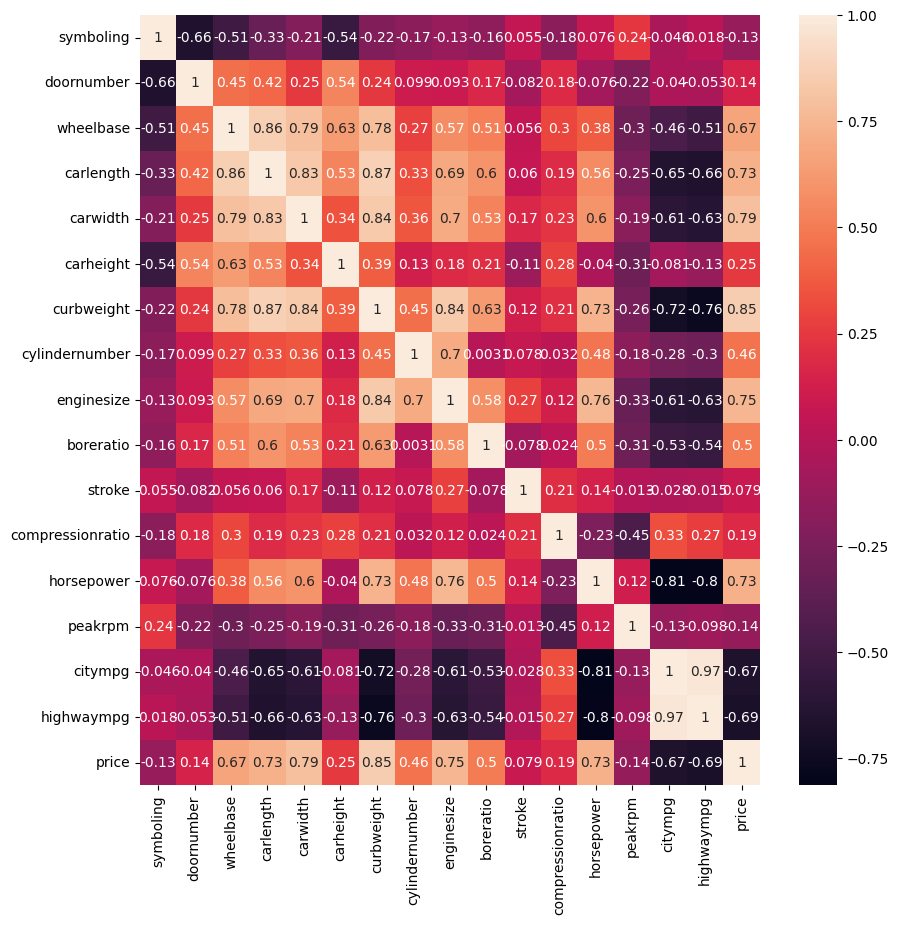

In [194]:
#correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [195]:
#feature selection
x_discrete=df[['company','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']]
x_continous=df[['symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]
y_copy=df[['price']]

In [196]:
from sklearn.feature_selection import f_classif
score=f_classif(x_continous,y_copy)
score

(array([ 1.86644131,  2.06291451,  7.92735646, 14.57274704, 13.82542648,
         2.64498267, 27.21027436,  3.85056282, 16.9998663 ,  1.99392755,
         2.28399614,  1.43616424, 10.16419217,  5.22376687,  9.47809445,
         7.09546938]),
 array([7.47931484e-02, 4.79404567e-02, 1.38727989e-05, 1.64995743e-07,
        2.44355487e-07, 1.40133626e-02, 1.42704670e-09, 1.64687230e-03,
        5.18694053e-08, 5.59570762e-02, 2.95694225e-02, 2.04783366e-01,
        2.34604595e-06, 2.38529633e-04, 3.88662333e-06, 3.01074717e-05]))

In [197]:
f_value=pd.Series(score[0],index=x_continous.columns)
f_value.sort_values(ascending=False)

curbweight          27.210274
enginesize          16.999866
carlength           14.572747
carwidth            13.825426
horsepower          10.164192
citympg              9.478094
wheelbase            7.927356
highwaympg           7.095469
peakrpm              5.223767
cylindernumber       3.850563
carheight            2.644983
stroke               2.283996
doornumber           2.062915
boreratio            1.993928
symboling            1.866441
compressionratio     1.436164
dtype: float64

In [198]:
p_value=pd.Series(score[1],index=x_continous.columns)
p_value.sort_values(ascending=False)

compressionratio    2.047834e-01
symboling           7.479315e-02
boreratio           5.595708e-02
doornumber          4.794046e-02
stroke              2.956942e-02
carheight           1.401336e-02
cylindernumber      1.646872e-03
peakrpm             2.385296e-04
highwaympg          3.010747e-05
wheelbase           1.387280e-05
citympg             3.886623e-06
horsepower          2.346046e-06
carwidth            2.443555e-07
carlength           1.649957e-07
enginesize          5.186941e-08
curbweight          1.427047e-09
dtype: float64

In [199]:
df1=pd.get_dummies(df[['company','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']],drop_first=True)
df1

,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_mazda,company_mercury,company_mitsubishi,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
202,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [200]:
df2=pd.concat([df,df1],axis=True)
df2


,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,0,1,0,0,0,0,0,1,0,0
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,2,audi,gas,std,4,sedan,fwd,front,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,1,0,0
201,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,0,1,0,0,0,0,0,1,0,0
203,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,1,0,0,0,0


In [201]:
df2.drop(['company','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem'],axis=1,inplace=True)
df2

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,1,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
201,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
202,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,...,0,1,0,0,0,0,0,1,0,0
203,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,...,0,0,0,0,0,1,0,0,0,0


In [202]:
df2.dtypes

symboling               int64
doornumber              int64
wheelbase             float64
carlength             float64
carwidth              float64
carheight             float64
curbweight              int64
cylindernumber          int64
enginesize              int64
boreratio             float64
stroke                float64
compressionratio      float64
horsepower              int64
peakrpm                 int64
citympg                 int64
highwaympg              int64
price                 float64
company_audi            uint8
company_bmw             uint8
company_buick           uint8
company_chevrolet       uint8
company_dodge           uint8
company_honda           uint8
company_isuzu           uint8
company_mazda           uint8
company_mercury         uint8
company_mitsubishi      uint8
company_nissan          uint8
company_peugeot         uint8
company_plymouth        uint8
company_porsche         uint8
company_renault         uint8
company_saab            uint8
company_su

**SPLITTING INPUT AND OUTPUT DATA**

In [203]:
x=df2.drop(['price'],axis=1)
x

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,1,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
201,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
202,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,...,0,1,0,0,0,0,0,1,0,0
203,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,...,0,0,0,0,0,1,0,0,0,0


In [204]:
y=df2['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 190, dtype: float64

In [205]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
29,3,2,95.9,173.2,66.3,50.2,2811,4,156,3.60,...,0,0,0,0,0,0,1,0,0,0
41,0,4,96.5,175.4,65.2,54.1,2465,4,110,3.15,...,0,0,0,0,0,0,0,1,0,0
132,3,2,99.1,186.6,66.5,56.1,2658,4,121,3.54,...,0,0,0,0,0,0,0,1,0,0
171,2,2,98.4,176.2,65.6,52.0,2714,4,146,3.62,...,0,0,0,0,0,0,0,1,0,0
148,0,4,96.9,173.6,65.4,54.9,2420,4,108,3.62,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0,4,108.0,186.7,68.3,56.0,3130,4,134,3.61,...,0,0,0,0,0,0,0,1,0,0
14,1,4,103.5,189.0,66.9,55.7,3055,6,164,3.31,...,0,0,0,0,0,0,0,1,0,0
103,0,4,100.4,184.6,66.5,55.1,3060,6,181,3.43,...,0,1,0,0,0,0,0,1,0,0
194,-2,4,104.3,188.8,67.2,56.2,2912,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0


In [206]:
x_test

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
190,3,2,94.5,165.7,64.0,51.4,2221,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
195,-1,4,104.3,188.8,67.2,57.5,3034,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
122,1,4,93.7,167.3,63.8,50.8,2191,4,98,2.97,...,0,0,0,1,0,0,0,0,0,0
76,2,2,93.7,157.3,64.4,50.8,1918,4,92,2.97,...,0,0,0,1,0,0,0,0,0,0
112,0,4,107.9,186.7,68.4,56.7,3252,4,152,3.70,...,0,0,0,0,0,1,0,0,0,0
18,2,2,88.4,141.1,60.3,53.2,1488,3,61,2.91,...,0,0,0,1,0,0,0,0,0,0
9,0,2,99.5,178.2,67.9,52.0,3053,5,131,3.13,...,0,0,0,0,0,0,0,1,0,0
19,1,2,94.5,155.9,63.6,52.0,1874,4,90,3.03,...,0,0,0,1,0,0,0,0,0,0
156,0,4,95.7,166.3,64.4,53.0,2081,4,98,3.19,...,0,0,0,1,0,0,0,0,0,0
139,2,2,93.7,157.9,63.6,53.7,2120,4,108,3.62,...,1,0,0,1,0,0,0,0,0,0






**MODEL CREATION AND PERFORMANCE EVALUATION**

In [207]:
# implementing hyperparameter tuning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
model=LinearRegression()

In [208]:
param={'fit_intercept':[True,False],'n_jobs':[True,False]}
clf=GridSearchCV(model,param,cv=10,scoring='neg_mean_squared_error')
clf.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'n_jobs': [True, False]},
             scoring='neg_mean_squared_error')

In [209]:
print(clf.best_params_)

{'fit_intercept': False, 'n_jobs': True}


In [210]:
model=LinearRegression(fit_intercept= False, n_jobs= True)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 7762.1538925 , 15516.40270058,  6675.72034958,  6807.52544813,
       16562.24057328,  -323.52317696, 20983.9444776 ,  5717.60758341,
        7372.34770022,  6437.47281053,  6428.71163914, 17944.0135516 ,
        4975.06695503, 16826.1722316 ,  7498.45217623, 14979.91292102,
       13835.5389258 ,  7108.72776077, 10081.49089139,  4971.39208771,
        7739.99613761,  9443.46809046, 13253.43528793, 16268.3391137 ,
       10354.13252357,  7825.89045951,  6671.94445174,  5138.67322761,
        6988.89483067,  9265.06404071,  7843.49089565,  7429.34753485,
       15205.80229701,  9041.0477142 ,  8794.93881862, 16511.95232859,
        6004.051831  ,  7729.83777259, 11421.71831451,  8735.01975585,
       14643.26215824, 15439.4055012 ,  9468.33377998, 12431.12710278,
       11643.75325479,  7669.90441562,  9248.51768349, 12510.66614465,
       17567.26904143,  7825.49474403, 12489.29149305, 20347.18187904,
        3793.69266675, 10146.44598307,  9269.07615851, 14399.47350264,
      

In [211]:
df3=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
df3

,Actual value,Predicted value,Difference
190,9980.000,7762.153892,2217.846108
195,13415.000,15516.402701,-2101.402701
122,7609.000,6675.720350,933.279650
76,5389.000,6807.525448,-1418.525448
112,16900.000,16562.240573,337.759427
18,5151.000,-323.523177,5474.523177
9,17859.167,20983.944478,-3124.777478
19,6295.000,5717.607583,577.392417
156,6938.000,7372.347700,-434.347700
139,7053.000,6437.472811,615.527189


In [212]:
print('slope is:')
list(zip(x,model.coef_))

slope is:


[('symboling', 65.54876791537333),
 ('doornumber', 528.1099936622679),
 ('wheelbase', 264.6906935746257),
 ('carlength', -92.7266805935171),
 ('carwidth', 242.78908539440522),
 ('carheight', -144.69357134868196),
 ('curbweight', 5.343662901275238),
 ('cylindernumber', 1221.658202931678),
 ('enginesize', 7.204171424681704),
 ('boreratio', -485.2703263045577),
 ('stroke', -982.9881061825096),
 ('compressionratio', -133.91953680621384),
 ('horsepower', -8.290948714847161),
 ('peakrpm', 0.2869173136136851),
 ('citympg', -100.47338695601547),
 ('highwaympg', 146.8577481755392),
 ('company_audi', 3137.766911924865),
 ('company_bmw', 3703.008251495879),
 ('company_buick', 3478.460141661223),
 ('company_chevrolet', -2368.6157625052124),
 ('company_dodge', -2791.0977899162203),
 ('company_honda', 1921.8319389085161),
 ('company_isuzu', -4241.1310485244),
 ('company_mazda', -329.86466223899777),
 ('company_mercury', -1934.6956609018719),
 ('company_mitsubishi', -1410.0428960401416),
 ('company_n

In [213]:
print('constant is:',model.intercept_)

constant is: 0.0


In [214]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MAPE :',mean_absolute_percentage_error(y_test,y_pred))
MSE=mean_squared_error(y_test,y_pred)
print('MSE :',MSE)
print('RMSE :',np.sqrt(MSE))
print('R2_Score :',r2_score(y_test,y_pred))

MAE : 1503.9775578411763
MAPE : 0.1666497218198918
MSE : 3828501.6764897904
RMSE : 1956.6557378572732
R2_Score : 0.7761901108456375
